## Context
<span style="color:#9370DB"><b>It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.</b></span> 

<span style="color:#9370DB"><b>The datasets contains transactions made by credit cards in September 2013 by european cardholders. </b></span> 


<span style="color:#9370DB"><b>This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. </b></span> 


## Content

<span style="color:#9370DB"><b>The datasets contains transactions made by credit cards in September 2013 by european cardholders.</b></span> 


<span style="color:#9370DB"><b>This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.</b></span> 


<span style="color:#9370DB"><b>The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.</b></span> 

<span style="color:#9370DB"><b>Dataset contains only numerical input variables which are the result of a PCA transformation. </b></span> 

<span style="color:#9370DB"><b>Unfortunately, due to confidentiality issues,  the original features and more background information about the data is not availabe. </b></span> 

<span style="color:#9370DB"><b>Features V1, V2, … V28 are the principal components obtained with PCA. </b></span> 

<span style="color:#9370DB"><b>The only features which have not been transformed with PCA are ‘Time’ and ‘Amount’.</b></span> 

<span style="color:#9370DB"><b>Feature ‘Time’ contains the seconds elapsed between each transaction and the first transaction in the dataset. </b></span> 

<span style="color:#9370DB"><b>The feature ‘Amount’ is the transaction Amount.</b></span> 

<span style="color:#9370DB"><b>Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise. </b></span> 

**Data Source**  <code style="background:#EEE8AA;color:#FFEFD5">https://datahub.io/machine-learning/creditcard</code>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
# reading the dataset
df=pd.read_csv('https://datahub.io/machine-learning/creditcard/r/creditcard.csv', encoding='utf-8-sig')

In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]',value=r'')

In [6]:
df['Class'] = df['Class'].astype(int)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null value is present

## Counting the fraudulent and non fraudulent cases

In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

##### The dataset is unbalanced. 

## Univariate Analysis

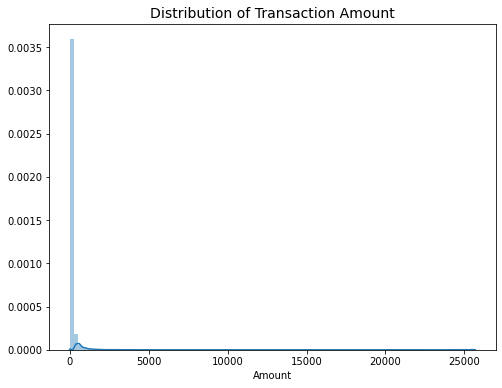

In [12]:
#df.Amount.hist(grid=False)
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['Amount'], bins=100)
plt.show()

As the histogram is not clear here, and it seems that lot many amount value is small, lets check the count of such transactions

In [13]:
len(df.Amount)

284807

In [14]:
## Checking count of transaction, where amount is less than 200
print("Number of transactions, where amount is less than 200 is: ", len(df[(df['Amount']<200)]))
print("Percentage of total transaction where transaction amount is less than 200 is :"+"{:.2f}".format(len(df[(df['Amount']<200)])/len(df.Amount) *100))

Number of transactions, where amount is less than 200 is:  255492
Percentage of total transaction where transaction amount is less than 200 is :89.71


Text(0.5, 1.0, 'Histogram of Transaction Amount < 200')

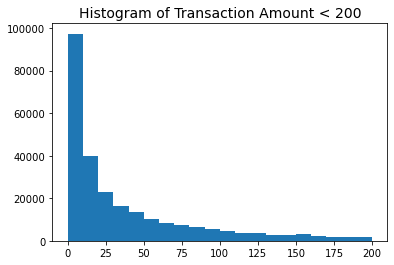

In [15]:
df[(df['Amount']<200)].Amount.hist(bins=20,grid=False)
plt.title('Histogram of Transaction Amount < 200', fontsize=14)

We can see that <b>89.71%</b> of the transaction have amount less than <b>200</b>, only few transactions have value on the higher side

In [16]:
df['Amount'].max()

25691.16

The maximum transaction amount is of amount <b>25691.16</b>

## Distribution of Amount for Fradulent & Genuine transactions

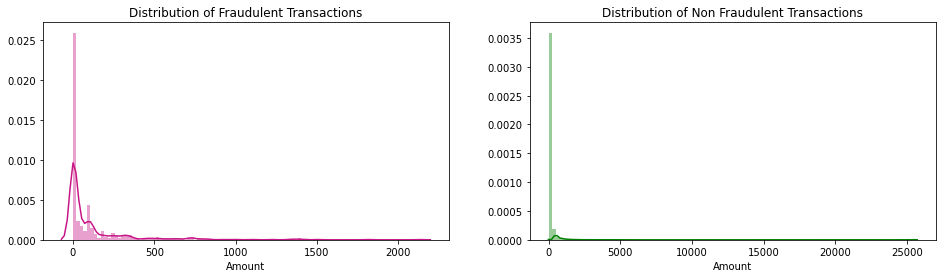

In [17]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0],color='#C71585')
axs[0].set_title("Distribution of Fraudulent Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1],color='#008000')
axs[1].set_title("Distribution of Non Fraudulent Transactions")

plt.show()

<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">Here we can see that fraudulent transactions occured for some of the lower amount also in the range of <b>0</b> also.
Also lot many transaction are less than <b>500</b>
Lets explore this more
</code>
</p>

In [18]:
print("The Fradulent Transactions where: \n")
print("Amount No of Transaction  \n",df[(df['Class']==1)& (df['Amount']==0)]['Amount'].value_counts())

The Fradulent Transactions where: 

Amount No of Transaction  
 0.0    27
Name: Amount, dtype: int64


In [19]:
print("Total number of transactions where fradulent amount is between 1 and 200:  \n",df[(df['Class']==1)& (df['Amount']>0)& (df['Amount']<=200)]['Class'].value_counts())

Total number of transactions where fradulent amount is between 1 and 200:  
 1    380
Name: Class, dtype: int64


In [20]:
print("Maximum amount for any fradulent transaction is : ",df[(df['Class'] == 1)]['Amount'].max())

Maximum amount for any fradulent transaction is :  2125.87


<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">
We can see that out of 492 transactions, 27 are of amount 0, and 380 are between 1 and 200
Maximum amount of fradulent transaction is <b>2125.87</b>
We already checked above that out of total transactions <b>89.71%</b> transactions (255492) is between amount <b>0 to 200</b>.
We checked before that the maximum transaction amount was <b>25691.16</b> (which was for <b>non fraudulent transaction / genuine transaction</b>)
It is interesting to see the distribution of Fraudulent and Genuine Transaction based on amount    
</code>
</p>

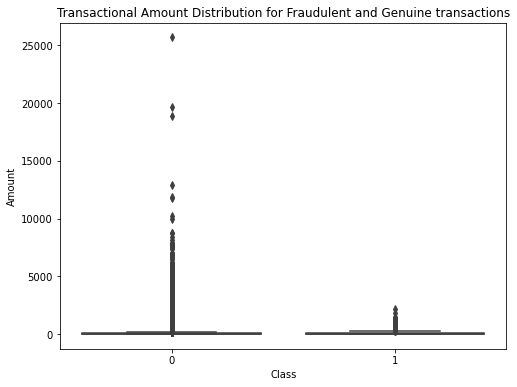

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Transactional Amount Distribution for Fraudulent and Genuine transactions')
plt.show()

<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">As we can see that transaction for class 1 (Fraudulent) is max upto 2125.87, and for class 0 (Genuine) there are few high transactional amount which was high 25691.16
</code>
</p>

## Let's explore the time data

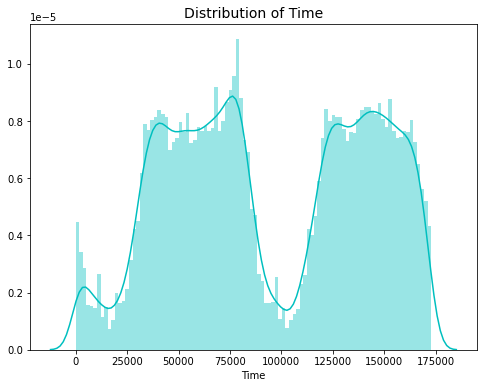

In [22]:
#df.Time.hist(grid=False)
plt.figure(figsize=(8,6))
plt.title('Distribution of Time', fontsize=14)
sns.distplot(df['Time'], bins=100,color='c')
plt.show()

##### As the time is cummulative time in seconds from first transaction, it would give more insight if we can convert it into independent time of the day

In [23]:
df['Time_hr']=df['Time']/(60*60)

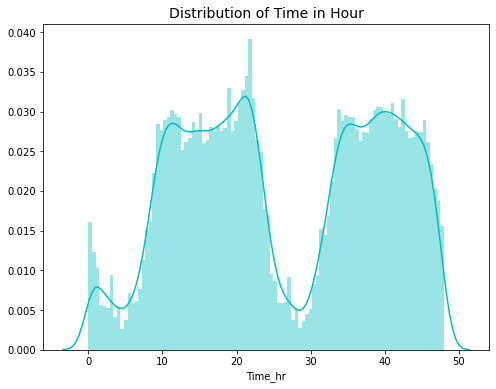

In [24]:
#df.Time.hist(grid=False)
plt.figure(figsize=(8,6))
plt.title('Distribution of Time in Hour', fontsize=14)
sns.distplot(df['Time_hr'], bins=100, color='c')
plt.show()

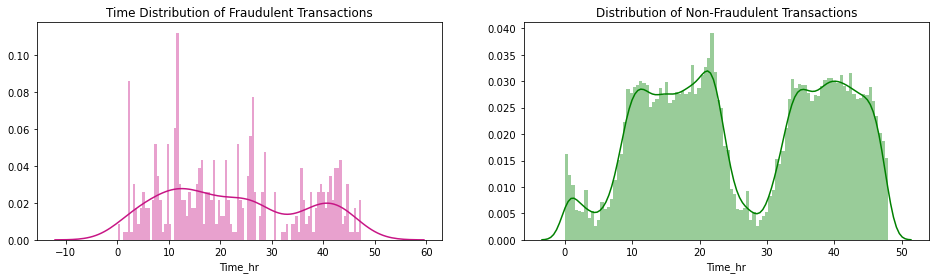

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 0)]['Time_hr'], bins=100, color='#008000', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraudulent Transactions")

sns.distplot(df[(df['Class'] == 1)]['Time_hr'], bins=100, color='#C71585', ax=axs[0])
axs[0].set_title("Time Distribution of Fraudulent Transactions")

plt.show()

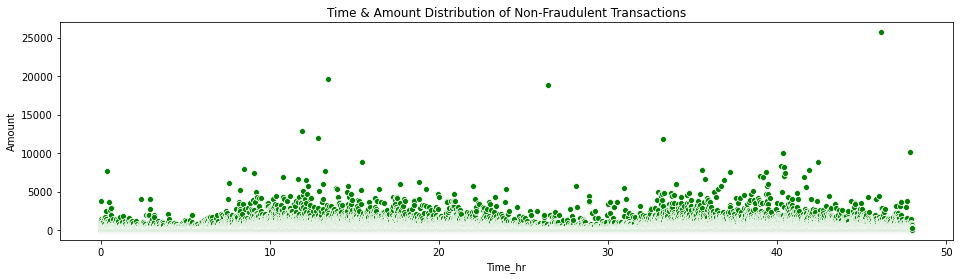

In [26]:
fig, axs = plt.subplots(figsize=(16,4))
df_0=df[df['Class']==0]
sns.scatterplot(df_0['Time_hr'],df_0['Amount'],color='#008000')
plt.title("Time & Amount Distribution of Non-Fraudulent Transactions")
plt.show()

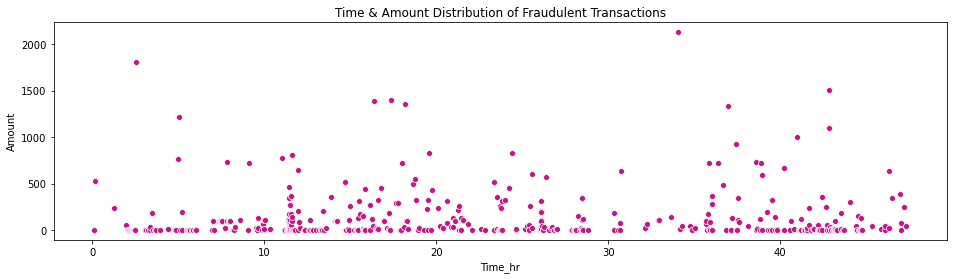

In [27]:
fig, axs = plt.subplots(figsize=(16,4))
df_1=df[df['Class']==1]
sns.scatterplot(df_1['Time_hr'],df_1['Amount'],color='#C71585')
plt.title("Time & Amount Distribution of Fraudulent Transactions")
plt.show()

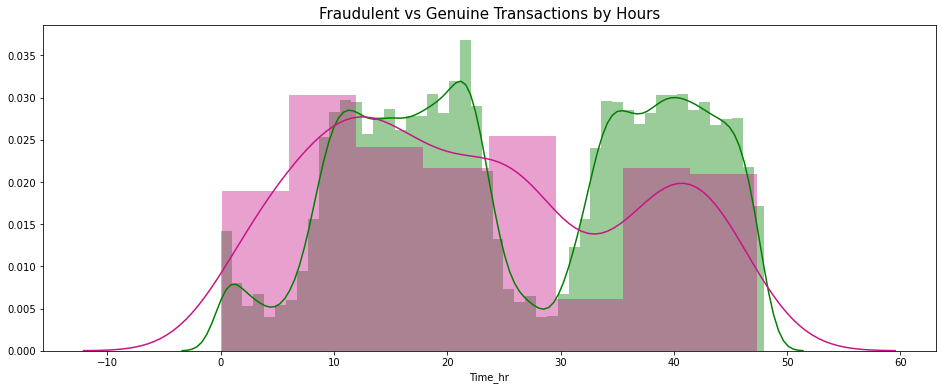

In [28]:
plt.figure(figsize=(16,6))
sns.distplot(df_0['Time_hr'], color='#008000')
sns.distplot(df_1['Time_hr'], color='#C71585')

plt.title('Fraudulent vs Genuine Transactions by Hours', fontsize=15)
plt.show()

<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">Although the fradulent transaction were distributed throughout the day, but <b>10th-12th</b> hour of the day were most active in term of fradulent transaction
Relatively fraudulent transaction was higher between <b>0 to 8</b> hours of both days
</code>
</p>

#### As we can see Amount, Time are not normally distributed
#### Let's check the skewness of dataframe

In [29]:
df.drop(['Time_hr'], axis = 1,inplace=True)

In [30]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

<Figure size 432x288 with 0 Axes>

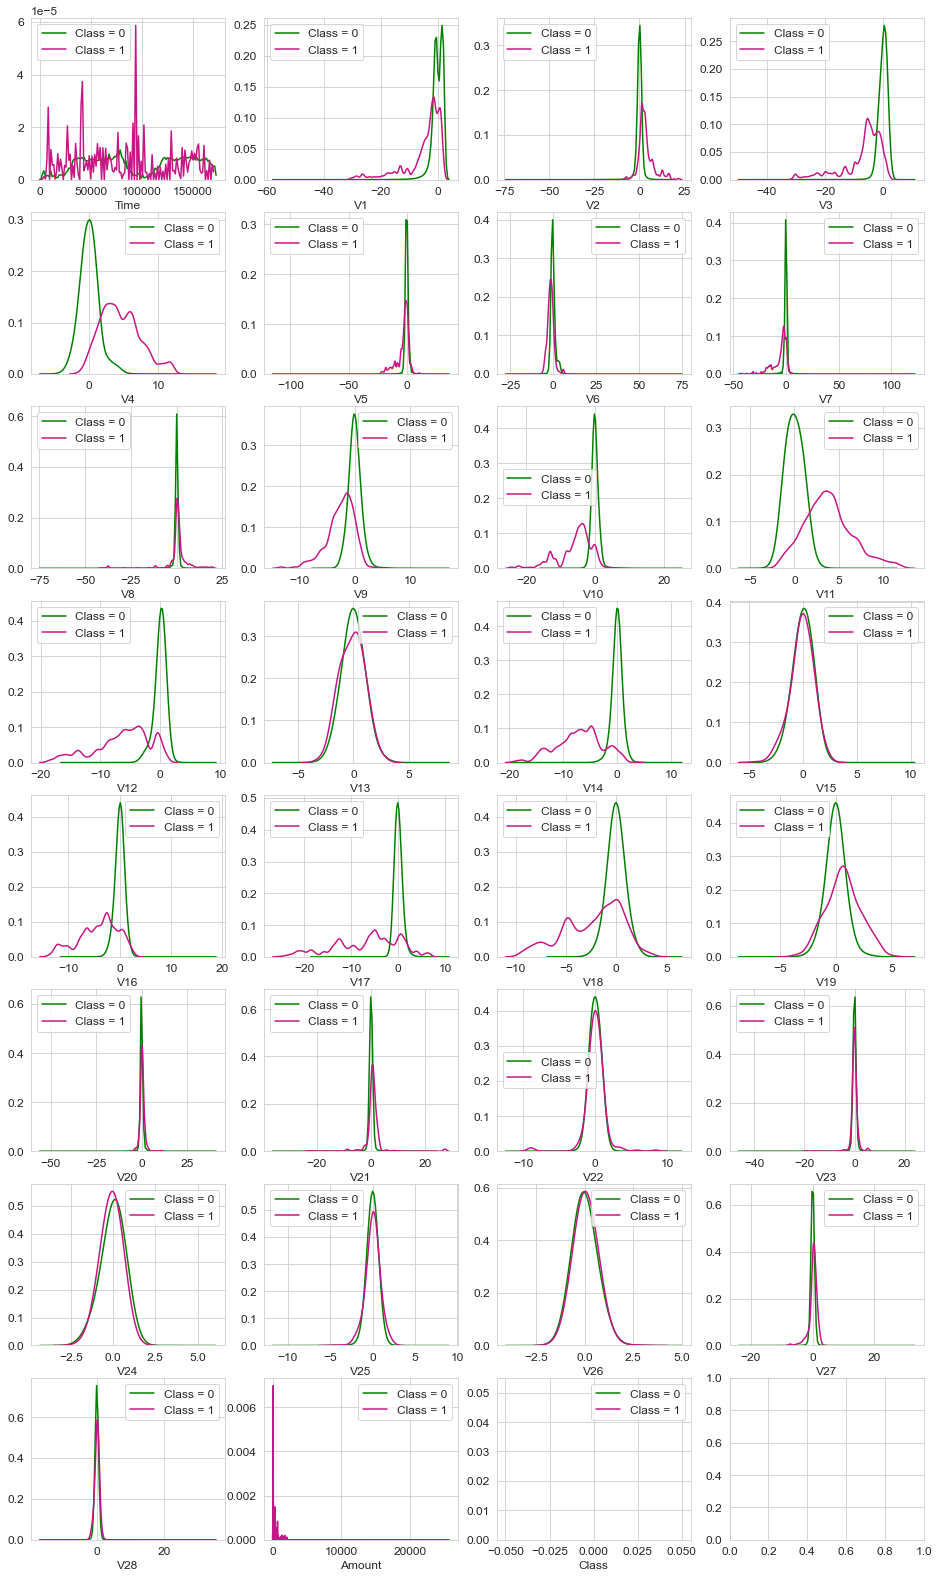

In [133]:
var = df.columns.values
i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0",color='#008000')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1",color='#C71585')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [134]:
# df.hist(figsize = (25,25))
# plt.show()

##### As per information availabe, the features V1, V2, ....V28 are the outcome of PCA, which means normalization of original features already done before PCA

##### But as data is skewed including PCA features, its better to normalize the data, using standard scaler, as we dont know about individual features

In [32]:
df1=df
#df=df1

In [33]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
# Separating the dataset into independent features and target class
X=df.drop(['Class'],axis=1)
y=df['Class']

In [35]:
# Before scaling the independent features, let's separte the data into training and test data, to avoid any information leak
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [37]:
X_train.skew()

Time      -0.036053
V1        -3.320269
V2        -4.826847
V3        -2.219375
V4         0.677776
V5        -2.928646
V6         1.977725
V7         3.744620
V8        -8.445014
V9         0.543603
V10        1.212102
V11        0.359527
V12       -2.281334
V13        0.067612
V14       -1.992812
V15       -0.308053
V16       -1.113875
V17       -3.975821
V18       -0.266115
V19        0.107289
V20       -1.977859
V21        3.656863
V22       -0.230008
V23       -6.285467
V24       -0.552668
V25       -0.417168
V26        0.579265
V27       -0.038330
V28       11.776522
Amount    18.352356
dtype: float64

##### As Amount is highly skewed, we will do log transformation to normalize the data
##### As other features are the outcome of PCA we are not doing any transformation on that

In [38]:
X_train['Amount'] = np.log(X_train['Amount']+0.00001)

In [39]:
X_test['Amount'] = np.log(X_test['Amount']+0.00001)

#### Let's check the correlation between independent variables

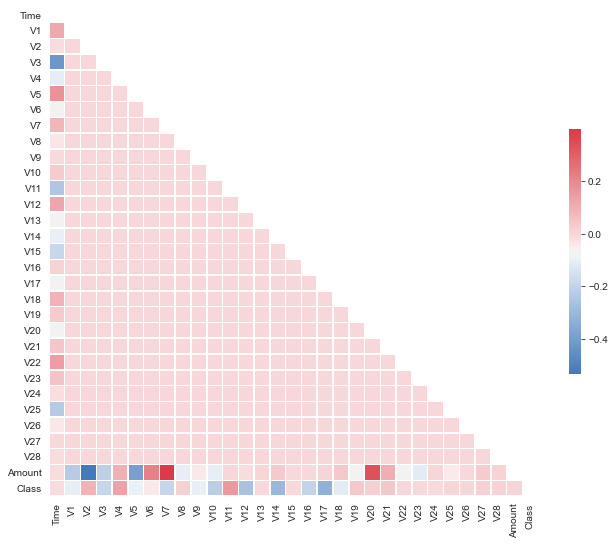

In [40]:
def CorrMtx(df, dropDuplicates = True):
    df = df.corr()
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    
    sns.set_style(style = 'white')

    
    f, ax = plt.subplots(figsize=(11, 9))

  
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

 
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df, dropDuplicates = True)

We can see here none of the features are highly correlated

In [41]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<code style="background:yellow;color:black">Dataset is imbalanced, but lets evaluate the classification model with original data, without using under sampling or over sampling.</code>

## Performance Measures for Prediction and Evaluation
In our dataset we have <b>'0'</b> as <b>Non Fraudulent (Genuine)</b> class and <b>'1' <b>Fraudulent</b> class 

</b>We use a Confusion Matrix to evaluate the accuracy of various model for classification of fradulent and genuine transaction

                          True Positives (TP)	    False Positives (FP)
                          False Negatives (FN)	    True Negatives (TN)

In a perfect model both False Positives and False Negatives in the matrix would be zero!

In our model for predicting the succesfulness of credit card fradulent the interpretation is as follows:


#### TP = The model predicts correctly a non-fradulent transaction
#### TN = The model predicts correctly a fradulent transaction
#### FN = The model predicts a non-fradulent transaction as a fradulent transaction
#### FP = The model predicts a fradulent transaction as a non-fradulent transaction


The Precision(=accuracy of the nagative (1) predictions), Recall(=ratio of negative instances correctly detected by the classifier) and f1-score may be more concise metrics, however.

Precision for 'non-fradulent transaction' = TP/(TP+FP)
Precision for 'fradulent transaction' = TN/(TN+FN)

Recall for 'non-fradulent transaction' = TP/(TP+FN)
Recall for 'fradulent transaction' = TN/(TN+FP)

The f1-score is the harmonic mean of Precision and Recall.

## Let's analyze the data using base models, with original imbalanced data

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train) 

LogisticRegression()

In [44]:
y_pred = lr.predict(X_test)

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.58      0.56        98

    accuracy                           1.00     56962
   macro avg       0.77      0.79      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99846
AUC : 0.77368
Precision : 0.54808
Recall : 0.58163
F1 : 0.56436


In [47]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[56817,    41],
       [   47,    57]], dtype=int64)

In [48]:
# let's check the actual value on test data

pd.Series(y_test).value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [49]:
# Predicted values
pd.Series(y_pred).value_counts()

0    56858
1      104
dtype: int64

<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">
Here our model predicts <b>104 fraudulent data</b>, compared to <b>actual 98</b> in test data
But <b>true negative</b> (our case is actual fraudulent) is <b>57</b>, identified by our model, compared to actual <b>98</b> cases
Also <b>47</b> cases are falsely identified as fradulent which are genuine cases
So overall performance is <b>not satisfactory</b>
This is clearly reflected in our <b>poor recall score 0.58163 & poor precision score 0.54808</b>
</code>
</p>

In [50]:
metrics.roc_auc_score(y_test , y_pred) 

0.7904030597889128

##### Let's plot ROC curve

AUC -  0.7904030597889128 



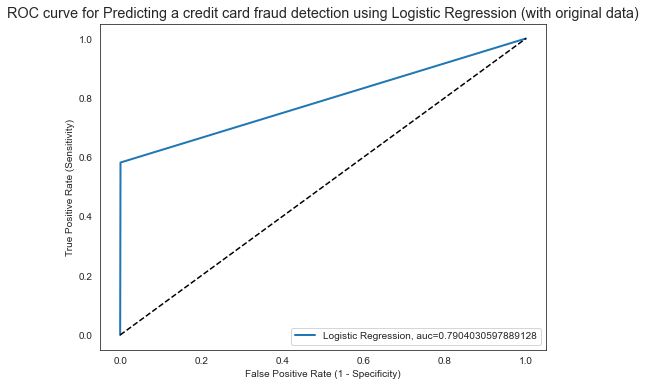

In [51]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection using Logistic Regression (with original data)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### Now, let's plot Precission- Recall Curve

f1=0.564


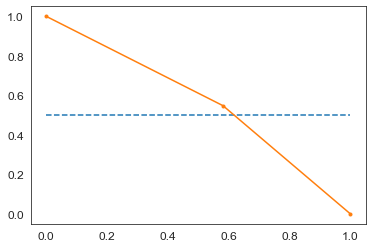

In [52]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt(max_depth=3)

In [54]:
clf

DecisionTreeClassifier(max_depth=3)

In [55]:
clf.fit(X_train, y_train)
y_test = clf.predict(X_test)

In [56]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       0.62      0.84      0.72        77

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [57]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99910
AUC : 0.81239
Precision : 0.62500
Recall : 0.84416
F1 : 0.71823


In [58]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[56846,    12],
       [   39,    65]], dtype=int64)

In [59]:
# Predicted values
pd.Series(y_pred).value_counts()

0    56858
1      104
dtype: int64

<p style="background:#EEE8AA">
<code style="background:#EEE8AA;color:black">
Here our model predicts <b>104 fraudulent data</b>, compared to <b>actual 98</b> in test data
But <b>true negative</b> (our case is actual fraudulent) is <b>65</b>, identified by our model, compared to <b>actual 98 cases (With LR it was 47)</b>
Also <b>39</b> cases are falsely identified as fradulent which are genuine cases (With LR it was 49)
This model performs better currently with <b>recall 0.84416</b>, <b>precision 0.62500</b>
</code>
</p>

**ROC Curve** for **Decision Tree**

AUC -  0.9217351252070421 



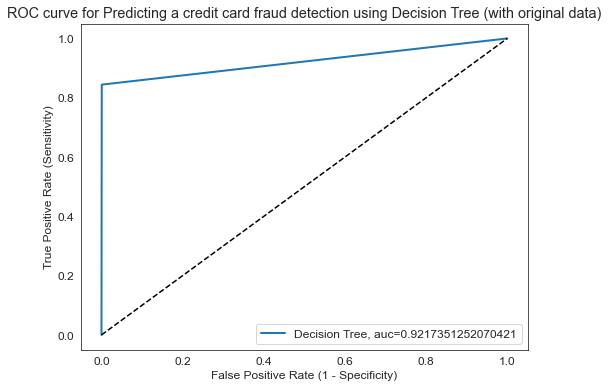

In [60]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="Decision Tree, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection using Decision Tree (with original data)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.718


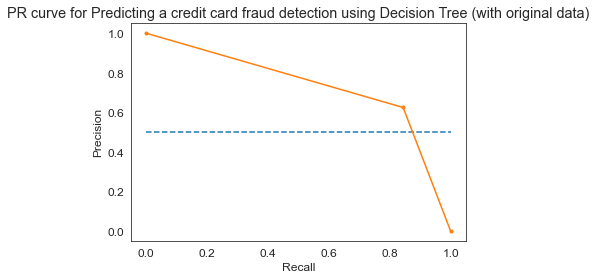

In [61]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
plt.title('PR curve for Predicting a credit card fraud detection using Decision Tree (with original data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the plot
plt.show()

### Support Vector Machine Classifier

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       0.71      0.47      0.56        77

    accuracy                           1.00     56962
   macro avg       0.85      0.73      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [65]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[56870,    41],
       [   15,    36]], dtype=int64)

In [66]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99902
AUC : 0.85258
Precision : 0.70588
Recall : 0.46753
F1 : 0.56250


##### Using linear SVC gives poor result

### KNN classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       1.00      0.13      0.23        77

    accuracy                           1.00     56962
   macro avg       1.00      0.56      0.61     56962
weighted avg       1.00      1.00      1.00     56962



In [70]:
cnf_matrix = metrics.confusion_matrix(y_pred,y_test)
cnf_matrix

array([[56885,    67],
       [    0,    10]], dtype=int64)

In [71]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.99882
AUC : 0.99941
Precision : 1.00000
Recall : 0.12987
F1 : 0.22989


##### KNN classification also gives poor result, recall is also just 0.12987

## The above evaluation is done on original dataset, now let's balance the dataset and check again

**Random undersampling :** deletes examples from the majority class and can result in losing information invaluable to a model.

**Random Oversampling :** duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

**Synthetic Minority OverSampling Technique (SMOTE) :** In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class.

**Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN) :** is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data.

In [72]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import _random_over_sampler, SMOTE, ADASYN

### Random Under Sampling

In [73]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [74]:
print("Distribution in original data (train data) set\n")
print(y_train.value_counts())

Distribution in original data (train data) set

0    227451
1       394
Name: Class, dtype: int64


In [75]:
print("Distribution after under sampling (train data) set\n")
print(y_train_rus.value_counts())

Distribution after under sampling (train data) set

1    394
0    394
Name: Class, dtype: int64


### Applying Logistic Regression to train on this under sampled data set and predicting with original test data

In [76]:
lr.fit(X_train_rus, y_train_rus)

y_pred_rus_lr = lr.predict(X_test)

In [77]:
print(metrics.classification_report(y_test, y_pred_rus_lr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56885
           1       0.03      0.99      0.06        77

    accuracy                           0.96     56962
   macro avg       0.52      0.97      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [78]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred_rus_lr , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus_lr)))

Accuracy :0.96133
AUC : 0.51667
Precision : 0.03336
Recall : 0.98701
F1 : 0.06454


In [79]:
cnf_matrix = metrics.confusion_matrix(y_pred_rus_lr,y_test)
cnf_matrix

array([[54683,     1],
       [ 2202,    76]], dtype=int64)

In [80]:
pd.Series(y_test).value_counts()

0    56885
1       77
dtype: int64

In [81]:
pd.Series(y_pred_rus_lr).value_counts()

0    54684
1     2278
dtype: int64

<div class="alert alert-block alert-success">
<b>Using under sampling:</b> with logistic regression the true negative classification incresed significantly from 57 earlier to <b>76</b>

    
<b>Recall also improved from 0.58164 to 0.98701.</b>
</div>

<div class="alert alert-block alert-danger">
    However the False Negative classification incresed significantly from 47 earlier to <b>2202</b>, which impacts <b>precision</b>, which dropped from
<b>0.54808</b> to <b>0.03336</b>.
</div>

We can see there is a shift of true positive case (non fraudulent) to false negative case



### Random Over Sampling

In [82]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [83]:
print("Distribution in original data (train data) set\n")
print(y_train.value_counts())

Distribution in original data (train data) set

0    227451
1       394
Name: Class, dtype: int64


In [84]:
print("Distribution after random over sampling (train data) set\n")
print(y_train_ros.value_counts())

Distribution after random over sampling (train data) set

1    227451
0    227451
Name: Class, dtype: int64


### Applying Logistic Regression to train on this random over sampled data set and predicting with original test data

In [85]:
lr.fit(X_train_ros, y_train_ros)

y_pred_ros_lr = lr.predict(X_test)

In [86]:
print(metrics.classification_report(y_test, y_pred_ros_lr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56885
           1       0.04      1.00      0.07        77

    accuracy                           0.96     56962
   macro avg       0.52      0.98      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [87]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_ros_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred_ros_lr , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros_lr)))

Accuracy :0.96431
AUC : 0.51825
Precision : 0.03649
Recall : 1.00000
F1 : 0.07042


In [88]:
cnf_matrix = metrics.confusion_matrix(y_pred_ros_lr,y_test)
cnf_matrix

array([[54852,     0],
       [ 2033,    77]], dtype=int64)

In [89]:
pd.Series(y_test).value_counts()

0    56885
1       77
dtype: int64

In [90]:
pd.Series(y_pred_ros_lr).value_counts()

0    54852
1     2110
dtype: int64

<div class="alert alert-block alert-success">
<b>Using Over Sampling:</b> with logistic regression the true negative classification incresed significantly from 57 earlier to <b>77</b> which is the same value we got in over sampling also.
</div>

<div class="alert alert-block alert-danger">
The False Negative classification incresed significantly from 47 earlier to **2033**, which impacts <b>precision</b>, which dropped from
 <b>0.54808</b> to <b>0.03649</b>.
</div>
The false negative was high for under sampling also
We can see there is a shift of true positive case (non fraudulent) to false negative case

### SMOTE

In [91]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [92]:
print("Distribution in original data (train data) set\n")
print(y_train.value_counts())

Distribution in original data (train data) set

0    227451
1       394
Name: Class, dtype: int64


In [93]:
print("Distribution after SMOTE (train data) set\n")
print(y_train_smote.value_counts())

Distribution after SMOTE (train data) set

1    227451
0    227451
Name: Class, dtype: int64


### Applying Logistic Regression to train on this SMOTE data set and predicting with original test data

In [94]:
lr.fit(X_train_smote, y_train_smote)

y_pred_SMOTE_lr = lr.predict(X_test)

In [95]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_SMOTE_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred_SMOTE_lr , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_SMOTE_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_SMOTE_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_SMOTE_lr)))

Accuracy :0.97653
AUC : 0.52690
Precision : 0.05382
Recall : 0.98701
F1 : 0.10208


In [96]:
cnf_matrix = metrics.confusion_matrix(y_pred_SMOTE_lr,y_test)
cnf_matrix

array([[55549,     1],
       [ 1336,    76]], dtype=int64)

In [97]:
pd.Series(y_test).value_counts()

0    56885
1       77
dtype: int64

In [98]:
pd.Series(y_pred_SMOTE_lr).value_counts()

0    55550
1     1412
dtype: int64

<div class="alert alert-block alert-success">
<b>Using SMOTE:</b> with logistic regression the true negative classification incresed significantly from 57 earlier to <b>77</b>, some what similar to under sampling and over sampling
</div>

<div class="alert alert-block alert-danger">
    The False Negative classification <b>1336</b>, is still on the higher side 
 <b>The pricision is not getting improved in this technique too</b>
</div>

### ADASYN

In [99]:
adasyn = ADASYN(random_state=42)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

In [100]:
print("Distribution in original data (train data) set\n")
print(y_train.value_counts())

Distribution in original data (train data) set

0    227451
1       394
Name: Class, dtype: int64


In [101]:
print("Distribution after ADASYN (train data) set\n")
print(y_train_ADASYN.value_counts())

Distribution after ADASYN (train data) set

1    227557
0    227451
Name: Class, dtype: int64


In [102]:
lr.fit(X_train_ADASYN, y_train_ADASYN)

y_pred_ADASYN_lr = lr.predict(X_test)

In [103]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_ADASYN_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred_ADASYN_lr , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ADASYN_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ADASYN_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ADASYN_lr)))

Accuracy :0.97888
AUC : 0.53008
Precision : 0.06016
Recall : 1.00000
F1 : 0.11349


In [104]:
cnf_matrix = metrics.confusion_matrix(y_pred_ADASYN_lr,y_test)
cnf_matrix

array([[55682,     0],
       [ 1203,    77]], dtype=int64)

<div class="alert alert-block alert-success">
<b>Using ADASYN:</b> The true negative case is almost same 77.
</div>

<div class="alert alert-block alert-danger">
    The False Negative classification is <b>1203</b>
The precision is 0.06016., which is not satisfactory
</div>

<code style="background:yellow;color:black"><b>In Logistic Regression:</b> The best recall and f1 score obtained using <b>ADASYN</b>.</code>

### Now let's compare all sampling techniques with different models and compare them

In [105]:
names_lst = []

# Empty list to capture performance matrix for train set
auc_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
auc_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def model_comparison(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Auc_train = metrics.roc_auc_score(y_train, y_train_pred)
        auc_train_lst.append(Auc_train)
        
        Auc_test = metrics.roc_auc_score(y_test , y_test_pred)
        auc_test_lst.append(Auc_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Auc_train))
        print('Test AUC : {0:0.5f}'.format(Auc_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
        
        
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve using test data for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [131]:
# Function for model building and performance measure

def model_comparison_pr(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        #names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)


        precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_test_pred)
        f1 = metrics.f1_score(y_test, y_test_pred)
        plt.plot(recall, precision, label=name + ", f1_score="+str(f1))
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('PR curve for Predicting a credit card fraud detection')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

### Logistic Regression

Model Name : LR imbalance
Train Accuracy :0.99869
Test Accuracy :0.99910
Train AUC : 0.84099
Test AUC : 0.92174
Train Precision : 0.60722
Test Precision : 0.62500
Train Recall : 0.68274
Test Recall : 0.84416
Train F1 : 0.64277
Test F1 : 0.71823
Confusion Matrix : 
 [[56846    39]
 [   12    65]]


Model Name : LR Undersampling
Train Accuracy :0.91371
Test Accuracy :0.96133
Train AUC : 0.91371
Test AUC : 0.97415
Train Precision : 0.95028
Test Precision : 0.03336
Train Recall : 0.87310
Test Recall : 0.98701
Train F1 : 0.91005
Test F1 : 0.06454
Confusion Matrix : 
 [[54683  2202]
 [    1    76]]


Model Name : LR Oversampling
Train Accuracy :0.94404
Test Accuracy :0.96431
Train AUC : 0.94404
Test AUC : 0.98213
Train Precision : 0.96297
Test Precision : 0.03649
Train Recall : 0.92359
Test Recall : 1.00000
Train F1 : 0.94287
Test F1 : 0.07042
Confusion Matrix : 
 [[54852  2033]
 [    0    77]]


Model Name : LR SMOTE
Train Accuracy :0.96676
Test Accuracy :0.97653
Train AUC : 0.96676
Test AU

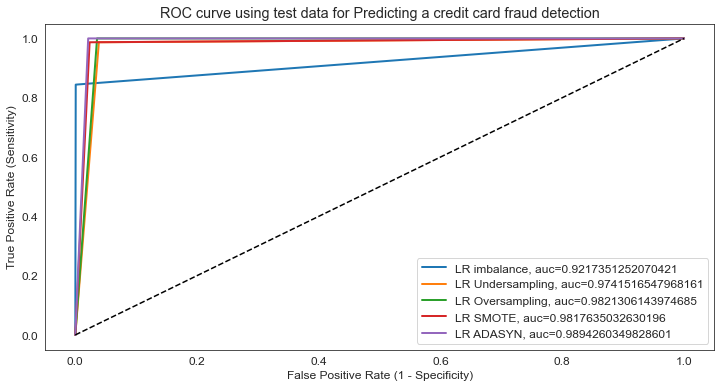

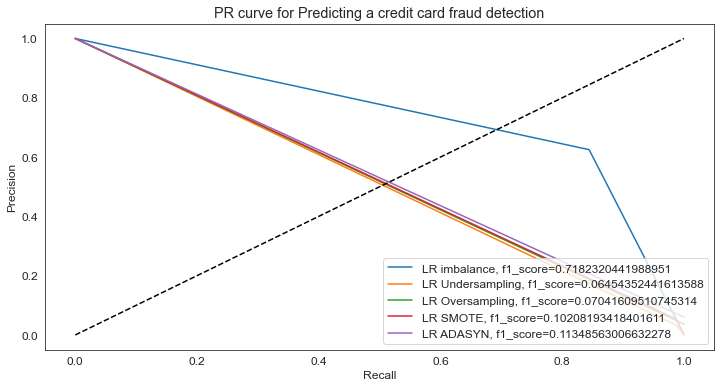

In [107]:
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(), X_train,y_train,X_test,y_test))
LRmodels.append(('LR Undersampling', LogisticRegression(),X_train_rus,y_train_rus,X_test,y_test))
LRmodels.append(('LR Oversampling', LogisticRegression(),X_train_ros,y_train_ros,X_test,y_test))
LRmodels.append(('LR SMOTE', LogisticRegression(),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(),X_train_ADASYN,y_train_ADASYN,X_test,y_test))


model_comparison(LRmodels)
model_comparison_pr(LRmodels)

#### In comaprison we are not considering imbalanced original dataset
<span style="color:#8A2BE2">Using Logistic Regression the best combination with maximum AUC is <b>ADASYN</b></span>

<span style="color:#8A2BE2">Using Logistic Regression the best combination with maximum f1_score is <b>ADASYN</b></span>

### Decision Tree

Model Name : DT imbalance
Train Accuracy :0.99935
Test Accuracy :1.00000
Train AUC : 0.86032
Test AUC : 1.00000
Train Precision : 0.88199
Test Precision : 1.00000
Train Recall : 0.72081
Test Recall : 1.00000
Train F1 : 0.79330
Test F1 : 1.00000
Confusion Matrix : 
 [[56885     0]
 [    0    77]]


Model Name : DT Undersampling
Train Accuracy :0.94162
Test Accuracy :0.96456
Train AUC : 0.94162
Test AUC : 0.97577
Train Precision : 0.98066
Test Precision : 0.03629
Train Recall : 0.90102
Test Recall : 0.98701
Train F1 : 0.93915
Test F1 : 0.07001
Confusion Matrix : 
 [[54867  2018]
 [    1    76]]


Model Name : DT Oversampling
Train Accuracy :0.94423
Test Accuracy :0.95267
Train AUC : 0.94423
Test AUC : 0.96982
Train Precision : 0.95108
Test Precision : 0.02743
Train Recall : 0.93662
Test Recall : 0.98701
Train F1 : 0.94380
Test F1 : 0.05337
Confusion Matrix : 
 [[54190  2695]
 [    1    76]]


Model Name : DT SMOTE
Train Accuracy :0.95995
Test Accuracy :0.98862
Train AUC : 0.95995
Test AU

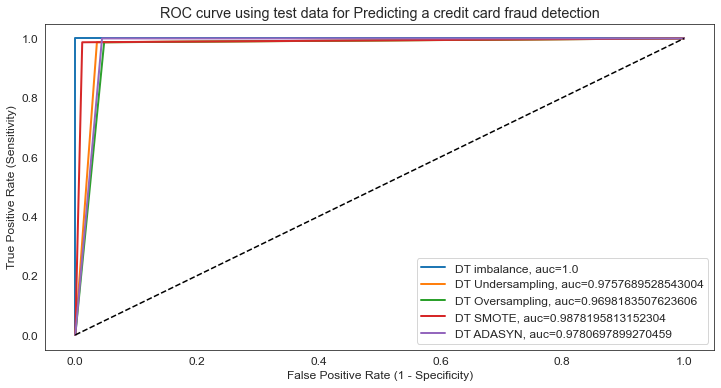

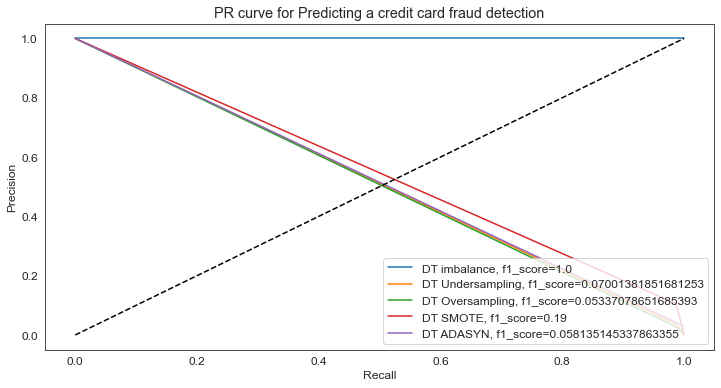

In [108]:
DTmodels = []

#dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', clf,X_train,y_train,X_test,y_test))
DTmodels.append(('DT Undersampling', clf,X_train_rus,y_train_rus,X_test,y_test))
DTmodels.append(('DT Oversampling', clf,X_train_ros,y_train_ros,X_test,y_test))
DTmodels.append(('DT SMOTE', clf,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', clf,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

model_comparison(DTmodels)
model_comparison_pr(DTmodels)

<span style="color:#DC143C">Using Decision Tree Classifier the best combination with maximum AUC is (0.9878) <b>SMOTE</b></span>


<span style="color:#DC143C">Using Decision Tree Classifier the best combination with maximum f1_score (0.19) is<b>SMOTE</b></span>

### SVC

In [109]:
# from sklearn.svm import SVC
# scv=SVC(kernel='linear')

In [110]:
# SVCmodels = []


# SVCmodels.append(('SVC imbalance', scv,X_train,y_train,X_test,y_test))
# SVCmodels.append(('SVC Undersampling', scv,X_train_rus,y_train_rus,X_test,y_test))
# SVCmodels.append(('SVC Oversampling', scv,X_train_ros,y_train_ros,X_test,y_test))
# SVCmodels.append(('SVC SMOTE', scv,X_train_smote,y_train_smote,X_test,y_test))
# SVCmodels.append(('SVC ADASYN', scv,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

# model_comparison(SVCmodels)

### KNN classification

Model Name : KNN imbalance
Train Accuracy :0.99854
Test Accuracy :0.99882
Train AUC : 0.57741
Test AUC : 0.56494
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 0.15482
Test Recall : 0.12987
Train F1 : 0.26813
Test F1 : 0.22989
Confusion Matrix : 
 [[56885     0]
 [   67    10]]


Model Name : KNN Undersampling
Train Accuracy :0.75761
Test Accuracy :0.65995
Train AUC : 0.75761
Test AUC : 0.68708
Train Precision : 0.76640
Test Precision : 0.00283
Train Recall : 0.74112
Test Recall : 0.71429
Train F1 : 0.75355
Test F1 : 0.00565
Confusion Matrix : 
 [[37537 19348]
 [   22    55]]


Model Name : KNN Oversampling
Train Accuracy :0.99987
Test Accuracy :0.99854
Train AUC : 0.99987
Test AUC : 0.65558
Train Precision : 0.99974
Test Precision : 0.44444
Train Recall : 1.00000
Test Recall : 0.31169
Train F1 : 0.99987
Test F1 : 0.36641
Confusion Matrix : 
 [[56855    30]
 [   53    24]]


Model Name : KNN SMOTE
Train Accuracy :0.98832
Test Accuracy :0.98383
Train AUC : 0.98832
Tes

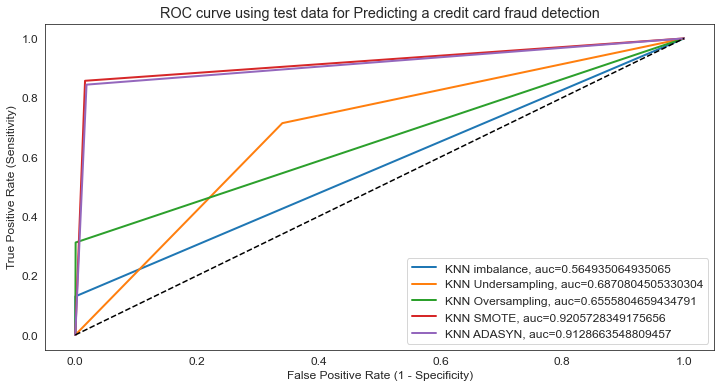

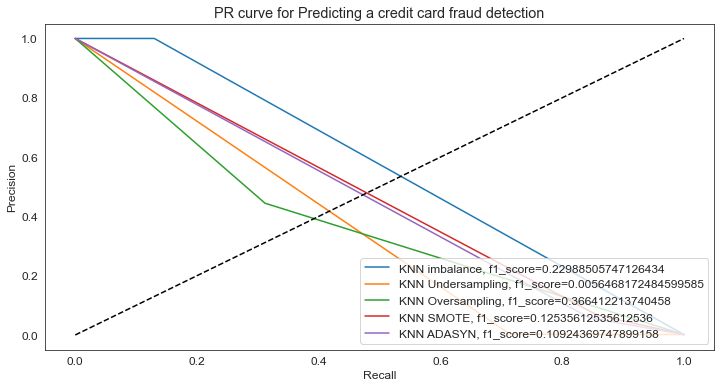

In [111]:
KNNmodels = []

KNNmodels.append(('KNN imbalance', knn,X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', knn,X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', knn,X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', knn,X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', knn,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

model_comparison(KNNmodels)
model_comparison_pr(KNNmodels)

<span style="color:#DC143C">Using KNN classification the best combination with maximum AUC is (0.9206) <b>SMOTE</b></span>


<span style="color:#32CD32">Using KNN classification the best combination with maximum f1_score (0.3664) is<b>Oversampling</b></span>

##### Let's check with random forest classifier for any better result

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=3)

Model Name : RF imbalance
Train Accuracy :0.99921
Test Accuracy :0.99984
Train AUC : 0.81718
Test AUC : 0.94804
Train Precision : 0.87413
Test Precision : 0.98571
Train Recall : 0.63452
Test Recall : 0.89610
Train F1 : 0.73529
Test F1 : 0.93878
Confusion Matrix : 
 [[56884     1]
 [    8    69]]


Model Name : RF Undersampling
Train Accuracy :0.93782
Test Accuracy :0.99396
Train AUC : 0.93782
Test AUC : 0.99698
Train Precision : 0.99712
Test Precision : 0.18290
Train Recall : 0.87817
Test Recall : 1.00000
Train F1 : 0.93387
Test F1 : 0.30924
Confusion Matrix : 
 [[56541   344]
 [    0    77]]


Model Name : RF Oversampling
Train Accuracy :0.93451
Test Accuracy :0.99345
Train AUC : 0.93451
Test AUC : 0.99672
Train Precision : 0.99260
Test Precision : 0.17111
Train Recall : 0.87556
Test Recall : 1.00000
Train F1 : 0.93041
Test F1 : 0.29222
Confusion Matrix : 
 [[56512   373]
 [    0    77]]


Model Name : RF SMOTE
Train Accuracy :0.95842
Test Accuracy :0.99393
Train AUC : 0.95842
Test AU

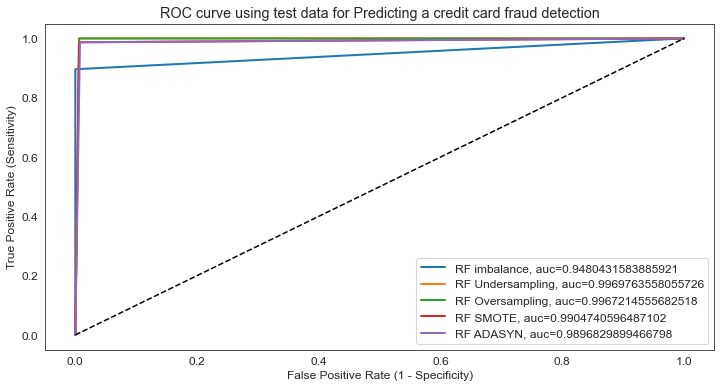

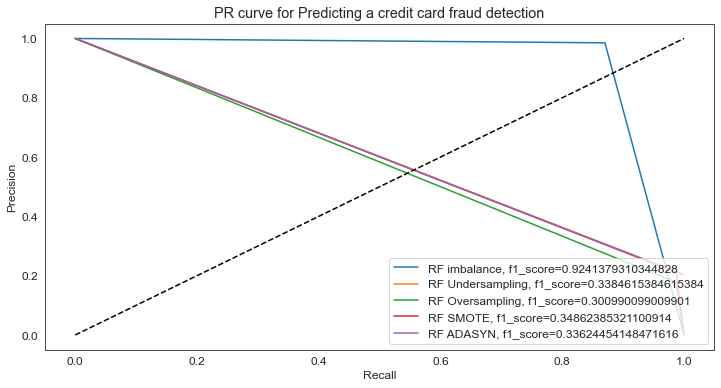

In [113]:
RFmodels = []

RFmodels.append(('RF imbalance', rfc,X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', rfc,X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', rfc,X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', rfc,X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', rfc,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

model_comparison(RFmodels)
model_comparison_pr(RFmodels)

<span style="color:#FF8C00">Using KNN classification the best combination with maximum AUC is (0.9970) <b>Undersampling</b></span>


<span style="color:#DC143C">Using KNN classification the best combination with maximum f1_score (0.3486) is<b> SMOTE</b></span>

### Now, let's compare the different models performance

In [114]:
data = {'Model':names_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Test':auc_test_lst,
       'PrecisionScore_Test':precision_test_lst,
       'RecallScore_Test':recall_test_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
5,DT imbalance,1.000000,1.000000,1.000000,1.000000,1.000000
15,RF imbalance,0.999842,0.948043,0.985714,0.896104,0.938776
0,LR imbalance,0.999105,0.921735,0.625000,0.844156,0.718232
12,KNN Oversampling,0.998543,0.655580,0.444444,0.311688,0.366412
16,RF Undersampling,0.993961,0.996976,0.182898,1.000000,0.309237
18,RF SMOTE,0.993926,0.990474,0.180523,0.987013,0.305221
17,RF Oversampling,0.993452,0.996721,0.171111,1.000000,0.292220
19,RF ADASYN,0.992346,0.989683,0.148728,0.987013,0.258503
10,KNN imbalance,0.998824,0.564935,1.000000,0.129870,0.229885
8,DT SMOTE,0.988624,0.987820,0.105118,0.987013,0.190000


##### Here we are getting good recall score, but precision is not good, ultimately f1 score is not satisfactory, we can check with ensemble techniques for any improvement

### Applying Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=3)

Model Name : RF imbalance
Train Accuracy :0.99923
Test Accuracy :0.99979
Train AUC : 0.82479
Test AUC : 0.93505
Train Precision : 0.87372
Test Precision : 0.97101
Train Recall : 0.64975
Test Recall : 0.87013
Train F1 : 0.74527
Test F1 : 0.91781
Confusion Matrix : 
 [[56883     2]
 [   10    67]]


Model Name : RF Undersampling
Train Accuracy :0.94036
Test Accuracy :0.99156
Train AUC : 0.94036
Test AUC : 0.99577
Train Precision : 0.99430
Test Precision : 0.13799
Train Recall : 0.88579
Test Recall : 1.00000
Train F1 : 0.93691
Test F1 : 0.24252
Confusion Matrix : 
 [[56404   481]
 [    0    77]]


Model Name : RF Oversampling
Train Accuracy :0.93856
Test Accuracy :0.99633
Train AUC : 0.93856
Test AUC : 0.99168
Train Precision : 0.99578
Test Precision : 0.26761
Train Recall : 0.88085
Test Recall : 0.98701
Train F1 : 0.93480
Test F1 : 0.42105
Confusion Matrix : 
 [[56677   208]
 [    1    76]]


Model Name : RF SMOTE
Train Accuracy :0.95919
Test Accuracy :0.99396
Train AUC : 0.95919
Test AU

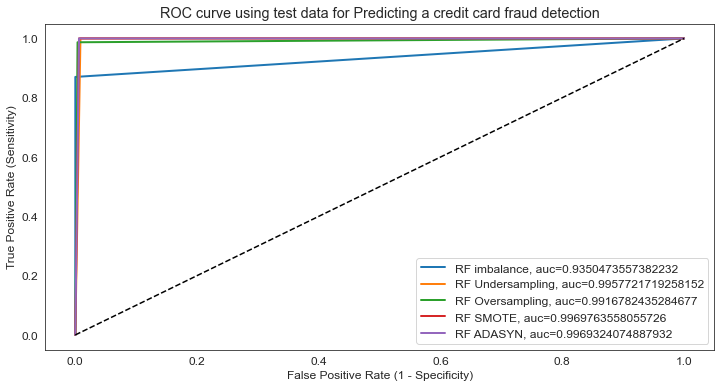

In [116]:
RFmodels = []

RFmodels.append(('RF imbalance', rfc,X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', rfc,X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', rfc,X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', rfc,X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', rfc,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

model_comparison(RFmodels)
model_comparison_pr(RFmodels)

In [117]:
data = {'Model':names_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Test':auc_test_lst,
       'PrecisionScore_Test':precision_test_lst,
       'RecallScore_Test':recall_test_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
5,DT imbalance,1.000000,1.000000,1.000000,1.000000,1.000000
15,RF imbalance,0.999842,0.948043,0.985714,0.896104,0.938776
20,RF imbalance,0.999789,0.935047,0.971014,0.870130,0.917808
0,LR imbalance,0.999105,0.921735,0.625000,0.844156,0.718232
22,RF Oversampling,0.996331,0.991678,0.267606,0.987013,0.421053
12,KNN Oversampling,0.998543,0.655580,0.444444,0.311688,0.366412
16,RF Undersampling,0.993961,0.996976,0.182898,1.000000,0.309237
23,RF SMOTE,0.993961,0.996976,0.182898,1.000000,0.309237
24,RF ADASYN,0.993873,0.996932,0.180751,1.000000,0.306163
18,RF SMOTE,0.993926,0.990474,0.180523,0.987013,0.305221


Now we can see that there is improvement in **recall** and **f1_score** using **ramdom forest classifier**

##### Let's try to tune model by some feature selection techniques

Feature selection using RFE

In [120]:
X_train.shape

(227845, 30)

<code style="background:yellow;color:black">Till now we have achieved maximum f1_score using Random Forest Over Sampling Techinique 
<b>f1_score = 0.421053, Recall = 0.267606, Precision = 0.267606</b></code>

**Let's use some boosting technique for better result**

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [124]:
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=200)
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=200)

In [125]:
y_pred_ada = clf_ada.predict(X_test)

In [126]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_SMOTE_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_pred_SMOTE_lr , y_test)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_SMOTE_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_SMOTE_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_SMOTE_lr)))

Accuracy :0.97653
AUC : 0.52690
Precision : 0.05382
Recall : 0.98701
F1 : 0.10208


In [127]:
cnf_matrix = metrics.confusion_matrix(y_pred_SMOTE_lr,y_test)
cnf_matrix

array([[55549,     1],
       [ 1336,    76]], dtype=int64)

In [128]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

Model Name : ADAmodels imbalance
Train Accuracy :1.00000
Test Accuracy :0.99960
Train AUC : 1.00000
Test AUC : 0.94144
Train Precision : 1.00000
Test Precision : 0.82927
Train Recall : 1.00000
Test Recall : 0.88312
Train F1 : 1.00000
Test F1 : 0.85535
Confusion Matrix : 
 [[56871    14]
 [    9    68]]


Model Name : ADAmodels Undersampling
Train Accuracy :1.00000
Test Accuracy :0.97516
Train AUC : 1.00000
Test AUC : 0.98756
Train Precision : 1.00000
Test Precision : 0.05161
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.09815
Confusion Matrix : 
 [[55470  1415]
 [    0    77]]


Model Name : ADAmodels Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99958
Train AUC : 1.00000
Test AUC : 0.92846
Train Precision : 1.00000
Test Precision : 0.83544
Train Recall : 1.00000
Test Recall : 0.85714
Train F1 : 1.00000
Test F1 : 0.84615
Confusion Matrix : 
 [[56872    13]
 [   11    66]]


Model Name : ADAmodels SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99939

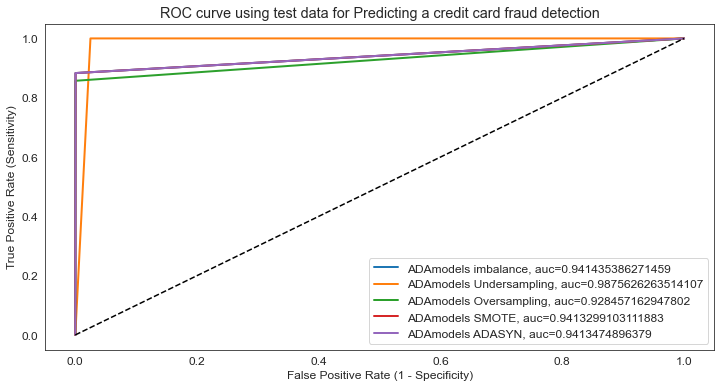

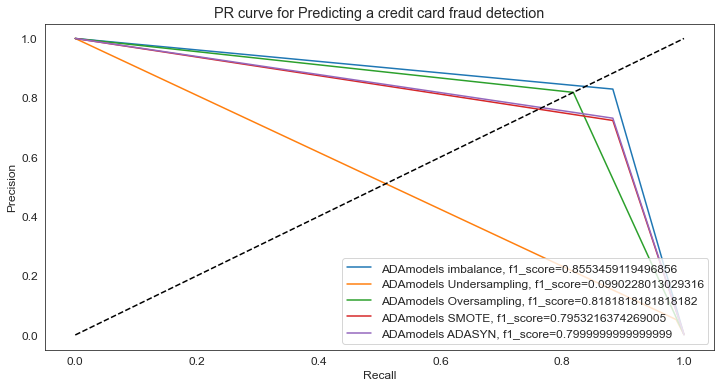

In [129]:
ADAmodels = []

#dt = DecisionTreeClassifier()

ADAmodels.append(('ADAmodels imbalance', clf_ada,X_train,y_train,X_test,y_test))
ADAmodels.append(('ADAmodels Undersampling', clf_ada,X_train_rus,y_train_rus,X_test,y_test))
ADAmodels.append(('ADAmodels Oversampling', clf_ada,X_train_ros,y_train_ros,X_test,y_test))
ADAmodels.append(('ADAmodels SMOTE', clf_ada,X_train_smote,y_train_smote,X_test,y_test))
ADAmodels.append(('ADAmodels ADASYN', clf_ada,X_train_ADASYN,y_train_ADASYN,X_test,y_test))

model_comparison(ADAmodels)
model_comparison_pr(ADAmodels)

### Comparing all models

In [130]:
data = {'Model':names_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Test':auc_test_lst,
       'PrecisionScore_Test':precision_test_lst,
       'RecallScore_Test':recall_test_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
5,DT imbalance,1.000000,1.000000,1.000000,1.000000,1.000000
15,RF imbalance,0.999842,0.948043,0.985714,0.896104,0.938776
20,RF imbalance,0.999789,0.935047,0.971014,0.870130,0.917808
25,ADAmodels imbalance,0.999596,0.941435,0.829268,0.883117,0.855346
27,ADAmodels Oversampling,0.999579,0.928457,0.835443,0.857143,0.846154
29,ADAmodels ADASYN,0.999421,0.941347,0.739130,0.883117,0.804734
28,ADAmodels SMOTE,0.999386,0.941330,0.723404,0.883117,0.795322
0,LR imbalance,0.999105,0.921735,0.625000,0.844156,0.718232
22,RF Oversampling,0.996331,0.991678,0.267606,0.987013,0.421053
12,KNN Oversampling,0.998543,0.655580,0.444444,0.311688,0.366412


<div class="alert alert-block alert-success">
<b>Result:</b> Here we can see that using ADA Boosting with over sampling the model gives
    
<b>Accuracy</b>     0.999579
    
<b>AUC</b>          0.928457
    
<b>Precision</b>    0.835443
    
<b>Recall</b>       0.857143
    
<b>F1 score</b>     0.846154.
</div>

**Which we can consider as a solution for our problem**

<div class="alert alert-block alert-info">
<b>Important Features:</b> The important features for predicting fradulent transaction</div>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

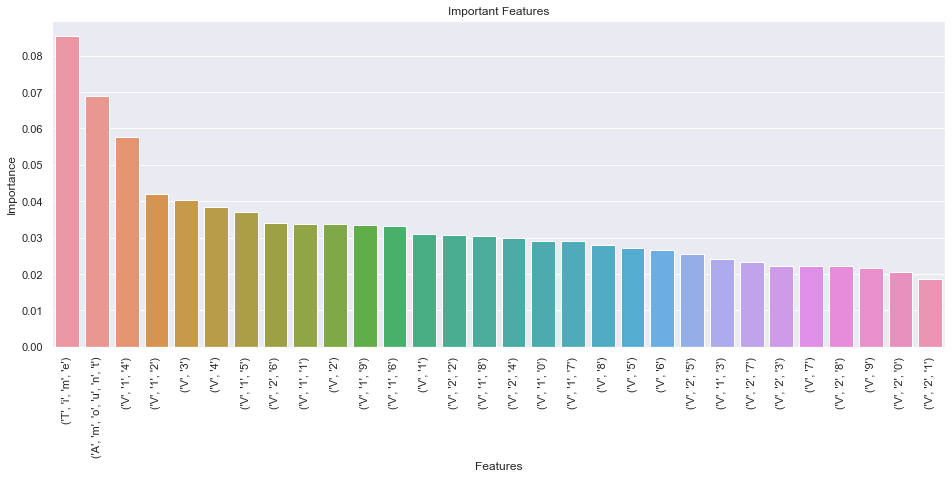

In [152]:
df_temp=pd.DataFrame({'Features':X_train_ros,'Importance':clf_ada.feature_importances_})
df_temp.sort_values(by='Importance',ascending=False,inplace=True)
sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(x='Features',y='Importance',data=df_temp).set(title='Important Features')
plt.xticks(rotation=90)

**Time** & **Amount** are the important features, followed by **V14**, **V12** and so on